## 03 Feature Engineering (v2)

#### Import relevant libraries

In [2]:
import os
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

#### Load processed dataset

In [3]:
input_dir = os.path.join('..', 'data', 'processed')
data_df = pd.read_csv(os.path.join(input_dir, 'processed_data.csv'))
data_df

,respondent_id,year,bill_gas,bill_other fuel,bill_adjustment,bill_distribution,bill_hydro,bill_nuclear,bill_other,bill_other_fossil,...,utype,generation_ee_dr,generation_hydro,generation_nuclear,generation_other_fossil,generation_purchased_power,generation_renewables_and_storage,generation_steam,energy_burden,normalized_expenditure
0,2.0,2005,375.031464,7.084629,9.540319,140.598363,24.935923,79.832394,93.020037,115.705892,...,vert_int,0.001164,4.436797,13.738337,5.483874,8.473223,0.0,49.987032,0.024592,81.676905
1,2.0,2006,403.967434,8.175744,20.977633,150.312633,25.845165,83.786720,112.218061,136.302804,...,vert_int,0.002765,2.812857,14.039622,6.153681,8.771999,0.0,50.243436,0.026468,89.320532
2,2.0,2007,362.674741,9.373432,25.958163,162.860281,26.922500,86.942468,136.816315,146.322099,...,vert_int,1.237031,1.403520,13.097867,6.950935,9.521604,0.0,51.081573,0.027564,97.147337
3,2.0,2008,389.722554,12.139279,17.184093,161.259248,25.216835,87.957893,136.354090,157.862545,...,vert_int,1.300172,2.477033,14.073225,7.199782,9.015558,0.0,49.206599,0.028647,108.684700
4,2.0,2009,368.234034,10.900991,22.232564,178.909959,25.595063,94.547352,144.596841,136.960261,...,vert_int,0.684756,5.903936,13.973577,8.799929,5.808104,0.0,41.204845,0.029137,108.551083
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1899,428.0,2016,120.751263,294.214436,-116.874290,203.470335,0.000000,0.000000,179.737203,0.000000,...,other_wires,0.000000,0.000000,0.000000,0.000004,0.818070,0.0,0.254507,0.018758,111.441490
1900,428.0,2017,144.546326,323.702090,-168.226409,206.674057,0.000000,0.000000,207.970206,0.000000,...,other_wires,0.000000,0.000000,0.000000,0.000003,0.788461,0.0,0.349109,0.015613,106.074202
1901,428.0,2018,337.354284,419.012129,-44.482765,218.418440,0.000000,0.000000,105.759399,0.000000,...,other_wires,0.000000,0.000000,0.000000,0.000000,0.846027,0.0,0.000000,0.017386,113.902374
1902,428.0,2019,304.415689,348.490451,-10.125463,228.879953,0.000000,0.000000,68.613095,0.000000,...,other_wires,0.000000,0.000000,0.000000,0.000000,0.823920,0.0,0.000000,0.016126,109.822755


In [4]:
is_after_2010 = data_df['year'] >= 2010  #inclusive
data_after_2010_df = data_df[is_after_2010]
data_after_2010_df

,respondent_id,year,bill_gas,bill_other fuel,bill_adjustment,bill_distribution,bill_hydro,bill_nuclear,bill_other,bill_other_fossil,...,utype,generation_ee_dr,generation_hydro,generation_nuclear,generation_other_fossil,generation_purchased_power,generation_renewables_and_storage,generation_steam,energy_burden,normalized_expenditure
5,2.0,2010,375.715469,13.529815,57.306195,207.855781,29.301764,108.447788,146.998675,147.119361,...,vert_int,0.595833,3.707895,13.169684,10.337048,4.793492,0.0,44.022450,0.033783,111.838989
6,2.0,2011,310.984887,10.408721,65.922993,198.367910,28.815423,106.466901,123.115743,132.823094,...,vert_int,0.049948,3.038090,14.431250,10.666586,4.675221,0.0,39.396937,0.031261,114.943218
7,2.0,2012,251.854838,7.318077,63.958472,193.694724,28.306831,116.294001,135.947289,111.941675,...,vert_int,0.070519,2.660740,14.762977,10.724467,5.435726,0.0,33.224328,0.029887,117.445000
8,2.0,2013,305.709743,8.302617,47.394754,196.508342,27.988239,116.667248,137.888028,119.111570,...,vert_int,0.085471,5.624866,14.098022,10.739554,4.010261,0.0,35.701607,0.028994,115.989436
9,2.0,2014,321.439930,9.774353,23.646072,206.273280,30.414294,121.274889,148.945759,127.578481,...,vert_int,0.096536,3.892956,14.505389,10.738816,6.554533,0.0,35.361499,0.030413,117.954902
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1899,428.0,2016,120.751263,294.214436,-116.874290,203.470335,0.000000,0.000000,179.737203,0.000000,...,other_wires,0.000000,0.000000,0.000000,0.000004,0.818070,0.0,0.254507,0.018758,111.441490
1900,428.0,2017,144.546326,323.702090,-168.226409,206.674057,0.000000,0.000000,207.970206,0.000000,...,other_wires,0.000000,0.000000,0.000000,0.000003,0.788461,0.0,0.349109,0.015613,106.074202
1901,428.0,2018,337.354284,419.012129,-44.482765,218.418440,0.000000,0.000000,105.759399,0.000000,...,other_wires,0.000000,0.000000,0.000000,0.000000,0.846027,0.0,0.000000,0.017386,113.902374
1902,428.0,2019,304.415689,348.490451,-10.125463,228.879953,0.000000,0.000000,68.613095,0.000000,...,other_wires,0.000000,0.000000,0.000000,0.000000,0.823920,0.0,0.000000,0.016126,109.822755


In [5]:
data_after_2010_df.columns

Index(['respondent_id', 'year', 'bill_gas', 'bill_other fuel',
       'bill_adjustment', 'bill_distribution', 'bill_hydro', 'bill_nuclear',
       'bill_other', 'bill_other_fossil', 'bill_purchased_power',
       'bill_renewables', 'bill_steam', 'bill_transmission', 'expenditure_gas',
       'expenditure_other fuel', 'expenditure_adjustment',
       'expenditure_distribution', 'expenditure_hydro', 'expenditure_nuclear',
       'expenditure_other', 'expenditure_other_fossil',
       'expenditure_purchased_power', 'expenditure_renewables',
       'expenditure_steam', 'expenditure_transmission', 'housing_units',
       'income', 'asset_value_distribution', 'asset_value_hydro',
       'asset_value_nuclear', 'asset_value_other', 'asset_value_other_fossil',
       'asset_value_renewables', 'asset_value_steam',
       'asset_value_transmission', 'earnings_value_distribution',
       'earnings_value_hydro', 'earnings_value_nuclear',
       'earnings_value_other', 'earnings_value_other_fossil',

In [6]:
data_after_2010_df['row_id'] = data_after_2010_df['respondent_id']*10000 + data_after_2010_df['year']
data_after_2010_df

<ipython-input-6-c9ff7db9c593>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_after_2010_df['row_id'] = data_after_2010_df['respondent_id']*10000 + data_after_2010_df['year']


,respondent_id,year,bill_gas,bill_other fuel,bill_adjustment,bill_distribution,bill_hydro,bill_nuclear,bill_other,bill_other_fossil,...,generation_ee_dr,generation_hydro,generation_nuclear,generation_other_fossil,generation_purchased_power,generation_renewables_and_storage,generation_steam,energy_burden,normalized_expenditure,row_id
5,2.0,2010,375.715469,13.529815,57.306195,207.855781,29.301764,108.447788,146.998675,147.119361,...,0.595833,3.707895,13.169684,10.337048,4.793492,0.0,44.022450,0.033783,111.838989,22010.0
6,2.0,2011,310.984887,10.408721,65.922993,198.367910,28.815423,106.466901,123.115743,132.823094,...,0.049948,3.038090,14.431250,10.666586,4.675221,0.0,39.396937,0.031261,114.943218,22011.0
7,2.0,2012,251.854838,7.318077,63.958472,193.694724,28.306831,116.294001,135.947289,111.941675,...,0.070519,2.660740,14.762977,10.724467,5.435726,0.0,33.224328,0.029887,117.445000,22012.0
8,2.0,2013,305.709743,8.302617,47.394754,196.508342,27.988239,116.667248,137.888028,119.111570,...,0.085471,5.624866,14.098022,10.739554,4.010261,0.0,35.701607,0.028994,115.989436,22013.0
9,2.0,2014,321.439930,9.774353,23.646072,206.273280,30.414294,121.274889,148.945759,127.578481,...,0.096536,3.892956,14.505389,10.738816,6.554533,0.0,35.361499,0.030413,117.954902,22014.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1899,428.0,2016,120.751263,294.214436,-116.874290,203.470335,0.000000,0.000000,179.737203,0.000000,...,0.000000,0.000000,0.000000,0.000004,0.818070,0.0,0.254507,0.018758,111.441490,4282016.0
1900,428.0,2017,144.546326,323.702090,-168.226409,206.674057,0.000000,0.000000,207.970206,0.000000,...,0.000000,0.000000,0.000000,0.000003,0.788461,0.0,0.349109,0.015613,106.074202,4282017.0
1901,428.0,2018,337.354284,419.012129,-44.482765,218.418440,0.000000,0.000000,105.759399,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.846027,0.0,0.000000,0.017386,113.902374,4282018.0
1902,428.0,2019,304.415689,348.490451,-10.125463,228.879953,0.000000,0.000000,68.613095,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.823920,0.0,0.000000,0.016126,109.822755,4282019.0


#### Create target variable

8 year timeframe: 2012 to 2020 (because calculatinng average change in residential price in a 3-year timeframe) 
building in delayed impact 

2012: (((2012 - 2011)/(2011)) + ((2011 - 2010)/(2010)))/2
OR
2012: (((2013 - 2012)/(2012)) + ((2014 - 2013)/(2013)))/2

TODO: add 2 more columns (prev_year, prev_2years)

In [7]:
# Target variable
normalized_expenditure = data_after_2010_df.reset_index()[['respondent_id', 'year', 'normalized_expenditure']]
normalized_expenditure


,respondent_id,year,normalized_expenditure
0,2.0,2010,111.838989
1,2.0,2011,114.943218
2,2.0,2012,117.445000
3,2.0,2013,115.989436
4,2.0,2014,117.954902
...,...,...,...
1304,428.0,2016,111.441490
1305,428.0,2017,106.074202
1306,428.0,2018,113.902374
1307,428.0,2019,109.822755


In [8]:
# orders['Lag'] = orders['total_order_cost'].shift(1, fill_value = 0)

# normalized_expenditure['prev_yr_exp'] = normalized_expenditure['normalized_expenditure'].shift(1, fill_value=0)
# normalized_expenditure['prev_2yrs_exp'] = normalized_expenditure['normalized_expenditure'].shift(2, fill_value=0)

normalized_expenditure['next_yr_exp'] = normalized_expenditure['normalized_expenditure'].shift(-1, fill_value=0)
normalized_expenditure['next_2yrs_exp'] = normalized_expenditure['normalized_expenditure'].shift(-2, fill_value=0)
normalized_expenditure.head(20)

,respondent_id,year,normalized_expenditure,next_yr_exp,next_2yrs_exp
0,2.0,2010,111.838989,114.943218,117.445000
1,2.0,2011,114.943218,117.445000,115.989436
2,2.0,2012,117.445000,115.989436,117.954902
3,2.0,2013,115.989436,117.954902,122.034790
4,2.0,2014,117.954902,122.034790,126.580203
5,2.0,2015,122.034790,126.580203,133.721222
6,2.0,2016,126.580203,133.721222,125.370902
7,2.0,2017,133.721222,125.370902,134.069903
8,2.0,2018,125.370902,134.069903,135.056713
9,2.0,2019,134.069903,135.056713,106.946635


In [9]:
# not_2010 = (normalized_expenditure['year'] != 2010)
# not_2011 = (normalized_expenditure['year'] != 2011)
pre_2018 = (normalized_expenditure['year'] <= 2018)
normalized_expenditure = normalized_expenditure[pre_2018]
normalized_expenditure.head(20)

,respondent_id,year,normalized_expenditure,next_yr_exp,next_2yrs_exp
0,2.0,2010,111.838989,114.943218,117.445000
1,2.0,2011,114.943218,117.445000,115.989436
2,2.0,2012,117.445000,115.989436,117.954902
3,2.0,2013,115.989436,117.954902,122.034790
4,2.0,2014,117.954902,122.034790,126.580203
5,2.0,2015,122.034790,126.580203,133.721222
6,2.0,2016,126.580203,133.721222,125.370902
7,2.0,2017,133.721222,125.370902,134.069903
8,2.0,2018,125.370902,134.069903,135.056713
11,3.0,2010,106.946635,120.987794,119.292404


In [10]:
## Target variable: 
normalized_expenditure['av_price_change'] = \
    ((normalized_expenditure['next_yr_exp'] - normalized_expenditure['normalized_expenditure'])/(normalized_expenditure['normalized_expenditure']) + \
    (normalized_expenditure['next_2yrs_exp'] - normalized_expenditure['next_yr_exp'])/(normalized_expenditure['next_yr_exp']))\
    /2
normalized_expenditure

<ipython-input-10-5c8163e77a78>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  normalized_expenditure['av_price_change'] = \


,respondent_id,year,normalized_expenditure,next_yr_exp,next_2yrs_exp,av_price_change
0,2.0,2010,111.838989,114.943218,117.445000,0.024761
1,2.0,2011,114.943218,117.445000,115.989436,0.004686
2,2.0,2012,117.445000,115.989436,117.954902,0.002276
3,2.0,2013,115.989436,117.954902,122.034790,0.025767
4,2.0,2014,117.954902,122.034790,126.580203,0.035918
...,...,...,...,...,...,...
1302,428.0,2014,128.591665,117.336134,111.441490,-0.068883
1303,428.0,2015,117.336134,111.441490,106.074202,-0.049200
1304,428.0,2016,111.441490,106.074202,113.902374,0.012818
1305,428.0,2017,106.074202,113.902374,109.822755,0.018991


In [11]:
target = normalized_expenditure['av_price_change'].reset_index(drop=True)
# target = pivot_df[2020].reset_index(drop=True)
target

0       0.024761
1       0.004686
2       0.002276
3       0.025767
4       0.035918
          ...   
1066   -0.068883
1067   -0.049200
1068    0.012818
1069    0.018991
1070   -0.021715
Name: av_price_change, Length: 1071, dtype: float64

In [84]:
# (normalized_expenditure[normalized_expenditure['year'] == 2020])

In [16]:
# # Target variable
# normalized_expenditure = data_df.reset_index()[['respondent_id', 'year', 'normalized_expenditure']]
# normalized_expenditure

In [13]:
# pivot_df = normalized_expenditure.pivot_table(
#     index='respondent_id', 
#     columns='year', 
#     aggfunc='first',
#     values='normalized_expenditure')
# pivot_df

In [14]:
# CAGR:
#t = 10
# pivot_df['normalized_expenditure_cagr'] = (pivot_df[2020]/pivot_df[2010])**0.1 - 1
# pivot_df

In [51]:
# pivot_df['percent_change_expenditure']= (((pivot_df[2020]-pivot_df[2011])/pivot_df[2011])\
#     +((pivot_df[2019]-pivot_df[2010])/pivot_df[2010]))/2
# pivot_df

In [52]:
# target = pivot_df['normalized_expenditure_cagr'].reset_index(drop=True)
# # target = pivot_df[2020].reset_index(drop=True)
# target

In [59]:
data_pre_2018_df = data_after_2010_df[data_after_2010_df['year'] <= 2018]
data_pre_2018_df

,respondent_id,year,bill_gas,bill_other fuel,bill_adjustment,bill_distribution,bill_hydro,bill_nuclear,bill_other,bill_other_fossil,...,generation_ee_dr,generation_hydro,generation_nuclear,generation_other_fossil,generation_purchased_power,generation_renewables_and_storage,generation_steam,energy_burden,normalized_expenditure,row_id
5,2.0,2010,375.715469,13.529815,57.306195,207.855781,29.301764,108.447788,146.998675,147.119361,...,0.595833,3.707895,13.169684,10.337048,4.793492,0.0,44.022450,0.033783,111.838989,22010.0
6,2.0,2011,310.984887,10.408721,65.922993,198.367910,28.815423,106.466901,123.115743,132.823094,...,0.049948,3.038090,14.431250,10.666586,4.675221,0.0,39.396937,0.031261,114.943218,22011.0
7,2.0,2012,251.854838,7.318077,63.958472,193.694724,28.306831,116.294001,135.947289,111.941675,...,0.070519,2.660740,14.762977,10.724467,5.435726,0.0,33.224328,0.029887,117.445000,22012.0
8,2.0,2013,305.709743,8.302617,47.394754,196.508342,27.988239,116.667248,137.888028,119.111570,...,0.085471,5.624866,14.098022,10.739554,4.010261,0.0,35.701607,0.028994,115.989436,22013.0
9,2.0,2014,321.439930,9.774353,23.646072,206.273280,30.414294,121.274889,148.945759,127.578481,...,0.096536,3.892956,14.505389,10.738816,6.554533,0.0,35.361499,0.030413,117.954902,22014.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1897,428.0,2014,158.113482,555.291597,-126.117586,203.376168,0.000000,0.000000,197.721946,0.000000,...,0.000000,0.000000,0.000000,0.000016,0.836826,0.0,0.356748,0.022694,128.591665,4282014.0
1898,428.0,2015,143.199850,384.308423,-112.101241,201.287076,0.000000,0.000000,194.074933,0.000000,...,0.000000,0.000000,0.000000,0.000003,0.822487,0.0,0.339950,0.019192,117.336134,4282015.0
1899,428.0,2016,120.751263,294.214436,-116.874290,203.470335,0.000000,0.000000,179.737203,0.000000,...,0.000000,0.000000,0.000000,0.000004,0.818070,0.0,0.254507,0.018758,111.441490,4282016.0
1900,428.0,2017,144.546326,323.702090,-168.226409,206.674057,0.000000,0.000000,207.970206,0.000000,...,0.000000,0.000000,0.000000,0.000003,0.788461,0.0,0.349109,0.015613,106.074202,4282017.0


#### Prepare DataFrames for Investments

In [61]:
investment_column_names = ['row_id', 'respondent_id', 'year', 'investment_value_distribution',
       'investment_value_hydro', 'investment_value_nuclear',
       'investment_value_other', 'investment_value_other_fossil',
       'investment_value_renewables', 'investment_value_steam',
       'investment_value_transmission', 'sales']

In [62]:
investment_column_names

['row_id',
 'respondent_id',
 'year',
 'investment_value_distribution',
 'investment_value_hydro',
 'investment_value_nuclear',
 'investment_value_other',
 'investment_value_other_fossil',
 'investment_value_renewables',
 'investment_value_steam',
 'investment_value_transmission',
 'sales']

In [63]:
investments_sales_df = data_pre_2018_df[investment_column_names]
investments_sales_df

,row_id,respondent_id,year,investment_value_distribution,investment_value_hydro,investment_value_nuclear,investment_value_other,investment_value_other_fossil,investment_value_renewables,investment_value_steam,investment_value_transmission,sales
5,22010.0,2.0,2010,296011623.0,6234229.0,77733140.0,94034652.0,0.0,0.0,946788067.0,136373665.0,20417032.0
6,22011.0,2.0,2011,351345076.0,22852001.0,144838131.0,68096283.0,0.0,0.0,257254121.0,216313521.0,18650366.0
7,22012.0,2.0,2012,258338498.0,14765465.0,58458982.0,157382446.0,0.0,0.0,54826093.0,153362827.0,17612420.0
8,22013.0,2.0,2013,287329351.0,26477815.0,50928276.0,256594847.0,0.0,0.0,72715405.0,176758705.0,17919762.0
9,22014.0,2.0,2014,328096305.0,39142268.0,31874019.0,148174915.0,0.0,0.0,318747804.0,315617541.0,18726485.0
...,...,...,...,...,...,...,...,...,...,...,...,...
1897,4282014.0,428.0,2014,5183490.0,0.0,0.0,515233.0,0.0,0.0,0.0,1885708.0,543147.0
1898,4282015.0,428.0,2015,5479993.0,0.0,0.0,230021.0,0.0,0.0,0.0,1684245.0,554166.0
1899,4282016.0,428.0,2016,4907945.0,0.0,0.0,278250.0,0.0,0.0,0.0,3297710.0,551190.0
1900,4282017.0,428.0,2017,9968608.0,0.0,0.0,234993.0,0.0,0.0,0.0,3240558.0,525781.0


In [64]:
investment_column_names_only = ['investment_value_distribution',
 'investment_value_hydro',
 'investment_value_nuclear',
 'investment_value_other',
 'investment_value_other_fossil',
 'investment_value_renewables',
 'investment_value_steam',
 'investment_value_transmission']
investment_column_names_only

['investment_value_distribution',
 'investment_value_hydro',
 'investment_value_nuclear',
 'investment_value_other',
 'investment_value_other_fossil',
 'investment_value_renewables',
 'investment_value_steam',
 'investment_value_transmission']

In [65]:
investments_sales_df['sum_investments'] = investments_sales_df[investment_column_names_only].sum(axis=1)
investments_sales_df['sum_investments_generation'] = investments_sales_df['sum_investments'] - investments_sales_df['investment_value_transmission'] - investments_sales_df['investment_value_distribution']
investments_sales_df

<ipython-input-65-8e7419e70f84>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  investments_sales_df['sum_investments'] = investments_sales_df[investment_column_names_only].sum(axis=1)
<ipython-input-65-8e7419e70f84>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  investments_sales_df['sum_investments_generation'] = investments_sales_df['sum_investments'] - investments_sales_df['investment_value_transmission'] - investments_sales_df['investment_value_distribution']


,row_id,respondent_id,year,investment_value_distribution,investment_value_hydro,investment_value_nuclear,investment_value_other,investment_value_other_fossil,investment_value_renewables,investment_value_steam,investment_value_transmission,sales,sum_investments,sum_investments_generation
5,22010.0,2.0,2010,296011623.0,6234229.0,77733140.0,94034652.0,0.0,0.0,946788067.0,136373665.0,20417032.0,1.557175e+09,1.124790e+09
6,22011.0,2.0,2011,351345076.0,22852001.0,144838131.0,68096283.0,0.0,0.0,257254121.0,216313521.0,18650366.0,1.060699e+09,4.930405e+08
7,22012.0,2.0,2012,258338498.0,14765465.0,58458982.0,157382446.0,0.0,0.0,54826093.0,153362827.0,17612420.0,6.971343e+08,2.854330e+08
8,22013.0,2.0,2013,287329351.0,26477815.0,50928276.0,256594847.0,0.0,0.0,72715405.0,176758705.0,17919762.0,8.708044e+08,4.067163e+08
9,22014.0,2.0,2014,328096305.0,39142268.0,31874019.0,148174915.0,0.0,0.0,318747804.0,315617541.0,18726485.0,1.181653e+09,5.379390e+08
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1897,4282014.0,428.0,2014,5183490.0,0.0,0.0,515233.0,0.0,0.0,0.0,1885708.0,543147.0,7.584431e+06,5.152330e+05
1898,4282015.0,428.0,2015,5479993.0,0.0,0.0,230021.0,0.0,0.0,0.0,1684245.0,554166.0,7.394259e+06,2.300210e+05
1899,4282016.0,428.0,2016,4907945.0,0.0,0.0,278250.0,0.0,0.0,0.0,3297710.0,551190.0,8.483905e+06,2.782500e+05
1900,4282017.0,428.0,2017,9968608.0,0.0,0.0,234993.0,0.0,0.0,0.0,3240558.0,525781.0,1.344416e+07,2.349930e+05


In [19]:
# Create a DataFranme of utility investments

# sum_investments_sales_df = data_after_2010_df[investment_column_names].groupby(by=["respondent_id"]).sum()
# investment_column_names.remove('respondent_id')
# sum_investments_sales_df

In [120]:
# sum_investments_sales_df['sum_investments'] = sum_investments_sales_df[investment_column_names].sum(axis=1)
# sum_investments_sales_df['sum_investments_generation'] = sum_investments_sales_df['sum_investments'] - sum_investments_sales_df['investment_value_transmission'] - sum_investments_sales_df['investment_value_distribution']
# sum_investments_sales_df

#### Prepare DataFrames for Expenditures

In [66]:
expenditure_column_names = ['row_id', 'respondent_id', 'year', 'expenditure_gas',
       'expenditure_other fuel', 'expenditure_adjustment',
       'expenditure_distribution', 'expenditure_hydro', 'expenditure_nuclear',
       'expenditure_other', 'expenditure_other_fossil',
       'expenditure_purchased_power', 'expenditure_renewables',
       'expenditure_steam', 'expenditure_transmission']

In [67]:
expenditures_df = data_pre_2018_df[expenditure_column_names]
expenditures_df

,row_id,respondent_id,year,expenditure_gas,expenditure_other fuel,expenditure_adjustment,expenditure_distribution,expenditure_hydro,expenditure_nuclear,expenditure_other,expenditure_other_fossil,expenditure_purchased_power,expenditure_renewables,expenditure_steam,expenditure_transmission
5,22010.0,2.0,2010,6.080564e+08,2.002633e+07,8.956252e+07,3.248530e+08,4.579505e+07,1.694905e+08,2.297408e+08,2.299294e+08,1.265088e+08,0.0,9.120914e+08,1.554485e+08
6,22011.0,2.0,2011,5.032305e+08,1.540458e+07,1.030160e+08,3.099838e+08,4.502904e+07,1.663728e+08,1.923894e+08,2.075588e+08,1.112800e+08,0.0,8.575845e+08,1.505196e+08
7,22012.0,2.0,2012,4.094341e+08,1.088067e+07,1.004088e+08,3.040825e+08,4.443907e+07,1.825707e+08,2.134245e+08,1.757379e+08,1.026648e+08,0.0,7.943939e+08,1.507688e+08
8,22013.0,2.0,2013,4.986984e+08,1.238707e+07,7.466188e+07,3.095634e+08,4.409042e+07,1.837882e+08,2.172177e+08,1.876388e+08,8.917199e+07,0.0,8.191430e+08,1.532276e+08
9,22014.0,2.0,2014,5.264963e+08,1.464226e+07,3.740197e+07,3.262710e+08,4.810755e+07,1.918255e+08,2.355937e+08,2.017962e+08,1.505080e+08,0.0,8.451021e+08,1.722740e+08
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1897,4282014.0,428.0,2014,1.094781e+07,4.082092e+07,-8.957539e+06,1.444485e+07,0.000000e+00,0.000000e+00,1.404326e+07,0.000000e+00,4.249500e+07,0.0,0.000000e+00,7.818629e+06
1898,4282015.0,428.0,2015,9.897865e+06,2.820214e+07,-7.948111e+06,1.427149e+07,0.000000e+00,0.000000e+00,1.376014e+07,0.000000e+00,3.707793e+07,0.0,0.000000e+00,7.862245e+06
1899,4282016.0,428.0,2016,8.508476e+06,2.201037e+07,-8.447606e+06,1.470672e+07,0.000000e+00,0.000000e+00,1.299130e+07,0.000000e+00,3.410134e+07,0.0,0.000000e+00,8.073650e+06
1900,4282017.0,428.0,2017,1.020631e+07,2.426669e+07,-1.218458e+07,1.496933e+07,0.000000e+00,0.000000e+00,1.506321e+07,0.000000e+00,2.981970e+07,0.0,0.000000e+00,8.104139e+06


In [68]:
expenditure_column_names.remove('respondent_id')
expenditure_column_names.remove('year')
expenditure_column_names.remove('row_id')
expenditure_column_names

['expenditure_gas',
 'expenditure_other fuel',
 'expenditure_adjustment',
 'expenditure_distribution',
 'expenditure_hydro',
 'expenditure_nuclear',
 'expenditure_other',
 'expenditure_other_fossil',
 'expenditure_purchased_power',
 'expenditure_renewables',
 'expenditure_steam',
 'expenditure_transmission']

In [70]:
expenditures_df['sum_expenditures'] = expenditures_df[expenditure_column_names].sum(axis=1)
expenditures_df['sum_expenditures_generation'] = expenditures_df['sum_expenditures'] - expenditures_df['expenditure_transmission'] - expenditures_df['expenditure_distribution']
expenditures_df

<ipython-input-70-1cf54224953d>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  expenditures_df['sum_expenditures'] = expenditures_df[expenditure_column_names].sum(axis=1)
<ipython-input-70-1cf54224953d>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  expenditures_df['sum_expenditures_generation'] = expenditures_df['sum_expenditures'] - expenditures_df['expenditure_transmission'] - expenditures_df['expenditure_distribution']


,row_id,respondent_id,year,expenditure_gas,expenditure_other fuel,expenditure_adjustment,expenditure_distribution,expenditure_hydro,expenditure_nuclear,expenditure_other,expenditure_other_fossil,expenditure_purchased_power,expenditure_renewables,expenditure_steam,expenditure_transmission,sum_expenditures,sum_expenditures_generation
5,22010.0,2.0,2010,6.080564e+08,2.002633e+07,8.956252e+07,3.248530e+08,4.579505e+07,1.694905e+08,2.297408e+08,2.299294e+08,1.265088e+08,0.0,9.120914e+08,1.554485e+08,2.911503e+09,2.431201e+09
6,22011.0,2.0,2011,5.032305e+08,1.540458e+07,1.030160e+08,3.099838e+08,4.502904e+07,1.663728e+08,1.923894e+08,2.075588e+08,1.112800e+08,0.0,8.575845e+08,1.505196e+08,2.662369e+09,2.201866e+09
7,22012.0,2.0,2012,4.094341e+08,1.088067e+07,1.004088e+08,3.040825e+08,4.443907e+07,1.825707e+08,2.134245e+08,1.757379e+08,1.026648e+08,0.0,7.943939e+08,1.507688e+08,2.488806e+09,2.033954e+09
8,22013.0,2.0,2013,4.986984e+08,1.238707e+07,7.466188e+07,3.095634e+08,4.409042e+07,1.837882e+08,2.172177e+08,1.876388e+08,8.917199e+07,0.0,8.191430e+08,1.532276e+08,2.589588e+09,2.126797e+09
9,22014.0,2.0,2014,5.264963e+08,1.464226e+07,3.740197e+07,3.262710e+08,4.810755e+07,1.918255e+08,2.355937e+08,2.017962e+08,1.505080e+08,0.0,8.451021e+08,1.722740e+08,2.750019e+09,2.251474e+09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1897,4282014.0,428.0,2014,1.094781e+07,4.082092e+07,-8.957539e+06,1.444485e+07,0.000000e+00,0.000000e+00,1.404326e+07,0.000000e+00,4.249500e+07,0.0,0.000000e+00,7.818629e+06,1.216129e+08,9.934945e+07
1898,4282015.0,428.0,2015,9.897865e+06,2.820214e+07,-7.948111e+06,1.427149e+07,0.000000e+00,0.000000e+00,1.376014e+07,0.000000e+00,3.707793e+07,0.0,0.000000e+00,7.862245e+06,1.031237e+08,8.098997e+07
1899,4282016.0,428.0,2016,8.508476e+06,2.201037e+07,-8.447606e+06,1.470672e+07,0.000000e+00,0.000000e+00,1.299130e+07,0.000000e+00,3.410134e+07,0.0,0.000000e+00,8.073650e+06,9.194424e+07,6.916387e+07
1900,4282017.0,428.0,2017,1.020631e+07,2.426669e+07,-1.218458e+07,1.496933e+07,0.000000e+00,0.000000e+00,1.506321e+07,0.000000e+00,2.981970e+07,0.0,0.000000e+00,8.104139e+06,9.024480e+07,6.717133e+07


In [24]:
# sum_expenditures_df = data_after_2010_df[expenditure_column_names].groupby(by=["respondent_id"]).sum()
# expenditure_column_names = expenditure_column_names.remove('respondent_id')
# sum_expenditures_df

In [25]:
# Experiencing some errors selecting columns, so respondent id is included in this sum.
# It should not be significant due to the magnitude of the numbers we are working with.
# sum_expenditures_df['sum_expenditures'] = sum_expenditures_df.sum(axis=1)
# sum_expenditures_df

#### Prepare DataFrames for Generation Mix

In [71]:
gen_column_names = ['row_id',
                    'respondent_id',
                    'year',
                    'generation_ee_dr', 
                    'generation_hydro', 
                    'generation_nuclear', 
                    'generation_other_fossil', 
                    'generation_steam', 
                    'generation_purchased_power', 
                    'generation_renewables_and_storage']

In [72]:
gen_mwh_df = data_pre_2018_df[gen_column_names]
gen_mwh_df

,row_id,respondent_id,year,generation_ee_dr,generation_hydro,generation_nuclear,generation_other_fossil,generation_steam,generation_purchased_power,generation_renewables_and_storage
5,22010.0,2.0,2010,0.595833,3.707895,13.169684,10.337048,44.022450,4.793492,0.0
6,22011.0,2.0,2011,0.049948,3.038090,14.431250,10.666586,39.396937,4.675221,0.0
7,22012.0,2.0,2012,0.070519,2.660740,14.762977,10.724467,33.224328,5.435726,0.0
8,22013.0,2.0,2013,0.085471,5.624866,14.098022,10.739554,35.701607,4.010261,0.0
9,22014.0,2.0,2014,0.096536,3.892956,14.505389,10.738816,35.361499,6.554533,0.0
...,...,...,...,...,...,...,...,...,...,...
1897,4282014.0,428.0,2014,0.000000,0.000000,0.000000,0.000016,0.356748,0.836826,0.0
1898,4282015.0,428.0,2015,0.000000,0.000000,0.000000,0.000003,0.339950,0.822487,0.0
1899,4282016.0,428.0,2016,0.000000,0.000000,0.000000,0.000004,0.254507,0.818070,0.0
1900,4282017.0,428.0,2017,0.000000,0.000000,0.000000,0.000003,0.349109,0.788461,0.0


In [73]:
gen_column_names.remove('respondent_id')
gen_column_names.remove('year')
gen_column_names.remove('row_id')
gen_column_names

['generation_ee_dr',
 'generation_hydro',
 'generation_nuclear',
 'generation_other_fossil',
 'generation_steam',
 'generation_purchased_power',
 'generation_renewables_and_storage']

In [74]:
gen_mwh_df['sum_total_generation'] = gen_mwh_df[gen_column_names].sum(axis=1)
gen_mwh_df

<ipython-input-74-4d10735c7cf2>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  gen_mwh_df['sum_total_generation'] = gen_mwh_df[gen_column_names].sum(axis=1)


,row_id,respondent_id,year,generation_ee_dr,generation_hydro,generation_nuclear,generation_other_fossil,generation_steam,generation_purchased_power,generation_renewables_and_storage,sum_total_generation
5,22010.0,2.0,2010,0.595833,3.707895,13.169684,10.337048,44.022450,4.793492,0.0,76.626402
6,22011.0,2.0,2011,0.049948,3.038090,14.431250,10.666586,39.396937,4.675221,0.0,72.258032
7,22012.0,2.0,2012,0.070519,2.660740,14.762977,10.724467,33.224328,5.435726,0.0,66.878757
8,22013.0,2.0,2013,0.085471,5.624866,14.098022,10.739554,35.701607,4.010261,0.0,70.259781
9,22014.0,2.0,2014,0.096536,3.892956,14.505389,10.738816,35.361499,6.554533,0.0,71.149729
...,...,...,...,...,...,...,...,...,...,...,...
1897,4282014.0,428.0,2014,0.000000,0.000000,0.000000,0.000016,0.356748,0.836826,0.0,1.193590
1898,4282015.0,428.0,2015,0.000000,0.000000,0.000000,0.000003,0.339950,0.822487,0.0,1.162440
1899,4282016.0,428.0,2016,0.000000,0.000000,0.000000,0.000004,0.254507,0.818070,0.0,1.072581
1900,4282017.0,428.0,2017,0.000000,0.000000,0.000000,0.000003,0.349109,0.788461,0.0,1.137573


In [75]:
gen_column_names_wo_purchased = ['generation_ee_dr',
 'generation_hydro',
 'generation_nuclear',
 'generation_other_fossil',
 'generation_steam',
 'generation_renewables_and_storage']
gen_column_names_wo_purchased

['generation_ee_dr',
 'generation_hydro',
 'generation_nuclear',
 'generation_other_fossil',
 'generation_steam',
 'generation_renewables_and_storage']

In [76]:
gen_mwh_df['sum_generation_wo_purchased'] = gen_mwh_df[gen_column_names_wo_purchased].sum(axis=1)
gen_mwh_df

<ipython-input-76-41ed83775fa8>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  gen_mwh_df['sum_generation_wo_purchased'] = gen_mwh_df[gen_column_names_wo_purchased].sum(axis=1)


,row_id,respondent_id,year,generation_ee_dr,generation_hydro,generation_nuclear,generation_other_fossil,generation_steam,generation_purchased_power,generation_renewables_and_storage,sum_total_generation,sum_generation_wo_purchased
5,22010.0,2.0,2010,0.595833,3.707895,13.169684,10.337048,44.022450,4.793492,0.0,76.626402,71.832910
6,22011.0,2.0,2011,0.049948,3.038090,14.431250,10.666586,39.396937,4.675221,0.0,72.258032,67.582811
7,22012.0,2.0,2012,0.070519,2.660740,14.762977,10.724467,33.224328,5.435726,0.0,66.878757,61.443031
8,22013.0,2.0,2013,0.085471,5.624866,14.098022,10.739554,35.701607,4.010261,0.0,70.259781,66.249520
9,22014.0,2.0,2014,0.096536,3.892956,14.505389,10.738816,35.361499,6.554533,0.0,71.149729,64.595196
...,...,...,...,...,...,...,...,...,...,...,...,...
1897,4282014.0,428.0,2014,0.000000,0.000000,0.000000,0.000016,0.356748,0.836826,0.0,1.193590,0.356764
1898,4282015.0,428.0,2015,0.000000,0.000000,0.000000,0.000003,0.339950,0.822487,0.0,1.162440,0.339953
1899,4282016.0,428.0,2016,0.000000,0.000000,0.000000,0.000004,0.254507,0.818070,0.0,1.072581,0.254511
1900,4282017.0,428.0,2017,0.000000,0.000000,0.000000,0.000003,0.349109,0.788461,0.0,1.137573,0.349112


In [77]:
gen_mwh_df['sum_fossil_generation'] = gen_mwh_df['generation_steam'] + gen_mwh_df['generation_other_fossil']
gen_mwh_df['sum_clean_generation'] = gen_mwh_df['generation_hydro'] + gen_mwh_df['generation_nuclear'] + gen_mwh_df['generation_renewables_and_storage']
gen_mwh_df

<ipython-input-77-7ffdd628056c>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  gen_mwh_df['sum_fossil_generation'] = gen_mwh_df['generation_steam'] + gen_mwh_df['generation_other_fossil']
<ipython-input-77-7ffdd628056c>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  gen_mwh_df['sum_clean_generation'] = gen_mwh_df['generation_hydro'] + gen_mwh_df['generation_nuclear'] + gen_mwh_df['generation_renewables_and_storage']


,row_id,respondent_id,year,generation_ee_dr,generation_hydro,generation_nuclear,generation_other_fossil,generation_steam,generation_purchased_power,generation_renewables_and_storage,sum_total_generation,sum_generation_wo_purchased,sum_fossil_generation,sum_clean_generation
5,22010.0,2.0,2010,0.595833,3.707895,13.169684,10.337048,44.022450,4.793492,0.0,76.626402,71.832910,54.359498,16.877579
6,22011.0,2.0,2011,0.049948,3.038090,14.431250,10.666586,39.396937,4.675221,0.0,72.258032,67.582811,50.063523,17.469340
7,22012.0,2.0,2012,0.070519,2.660740,14.762977,10.724467,33.224328,5.435726,0.0,66.878757,61.443031,43.948795,17.423717
8,22013.0,2.0,2013,0.085471,5.624866,14.098022,10.739554,35.701607,4.010261,0.0,70.259781,66.249520,46.441161,19.722888
9,22014.0,2.0,2014,0.096536,3.892956,14.505389,10.738816,35.361499,6.554533,0.0,71.149729,64.595196,46.100315,18.398345
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1897,4282014.0,428.0,2014,0.000000,0.000000,0.000000,0.000016,0.356748,0.836826,0.0,1.193590,0.356764,0.356764,0.000000
1898,4282015.0,428.0,2015,0.000000,0.000000,0.000000,0.000003,0.339950,0.822487,0.0,1.162440,0.339953,0.339953,0.000000
1899,4282016.0,428.0,2016,0.000000,0.000000,0.000000,0.000004,0.254507,0.818070,0.0,1.072581,0.254511,0.254511,0.000000
1900,4282017.0,428.0,2017,0.000000,0.000000,0.000000,0.000003,0.349109,0.788461,0.0,1.137573,0.349112,0.349112,0.000000


In [78]:
# gen_mwh_df = data_after_2010_df[gen_column_names].groupby(by=['respondent_id']).sum().reset_index()
# gen_mwh_df['sum_total_generation'] = gen_mwh_df.drop('respondent_id', axis=1).sum(axis=1)
# gen_mwh_df['sum_generation_wo_purchased'] = gen_mwh_df.drop(['respondent_id','sum_total_generation', 'generation_purchased_power'], axis=1).sum(axis=1)
# gen_mwh_df['sum_fossil_generation'] = gen_mwh_df['generation_steam'] + gen_mwh_df['generation_other_fossil']
# gen_mwh_df['sum_clean_generation'] = gen_mwh_df['generation_hydro'] + gen_mwh_df['generation_nuclear'] + gen_mwh_df['generation_renewables_and_storage']
# gen_mwh_df.head()

#### Prepare DataFrames for Bills

In [79]:
bill_column_names = ['row_id','respondent_id', 'year', 'bill_gas', 'bill_other fuel',
       'bill_adjustment', 'bill_distribution', 'bill_hydro', 'bill_nuclear',
       'bill_other', 'bill_other_fossil', 'bill_purchased_power',
       'bill_renewables', 'bill_steam', 'bill_transmission']

In [80]:
sum_bills_df = data_pre_2018_df[bill_column_names]
sum_bills_df

,row_id,respondent_id,year,bill_gas,bill_other fuel,bill_adjustment,bill_distribution,bill_hydro,bill_nuclear,bill_other,bill_other_fossil,bill_purchased_power,bill_renewables,bill_steam,bill_transmission
5,22010.0,2.0,2010,375.715469,13.529815,57.306195,207.855781,29.301764,108.447788,146.998675,147.119361,80.946118,0.0,583.597747,99.463021
6,22011.0,2.0,2011,310.984887,10.408721,65.922993,198.367910,28.815423,106.466901,123.115743,132.823094,71.211382,0.0,548.793926,96.321952
7,22012.0,2.0,2012,251.854838,7.318077,63.958472,193.694724,28.306831,116.294001,135.947289,111.941675,65.395517,0.0,506.013642,96.036797
8,22013.0,2.0,2013,305.709743,8.302617,47.394754,196.508342,27.988239,116.667248,137.888028,119.111570,56.605652,0.0,519.985275,97.267614
9,22014.0,2.0,2014,321.439930,9.774353,23.646072,206.273280,30.414294,121.274889,148.945759,127.578481,95.153379,0.0,534.285890,108.914163
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1897,4282014.0,428.0,2014,158.113482,555.291597,-126.117586,203.376168,0.000000,0.000000,197.721946,0.000000,598.307931,0.0,0.000000,110.082314
1898,4282015.0,428.0,2015,143.199850,384.308423,-112.101241,201.287076,0.000000,0.000000,194.074933,0.000000,522.952149,0.0,0.000000,110.890173
1899,4282016.0,428.0,2016,120.751263,294.214436,-116.874290,203.470335,0.000000,0.000000,179.737203,0.000000,471.798696,0.0,0.000000,111.700542
1900,4282017.0,428.0,2017,144.546326,323.702090,-168.226409,206.674057,0.000000,0.000000,207.970206,0.000000,411.705696,0.0,0.000000,111.889786


In [81]:
bill_column_names = ['bill_gas', 'bill_other fuel',
       'bill_adjustment', 'bill_distribution', 'bill_hydro', 'bill_nuclear',
       'bill_other', 'bill_other_fossil', 'bill_purchased_power',
       'bill_renewables', 'bill_steam', 'bill_transmission']
bill_column_names

['bill_gas',
 'bill_other fuel',
 'bill_adjustment',
 'bill_distribution',
 'bill_hydro',
 'bill_nuclear',
 'bill_other',
 'bill_other_fossil',
 'bill_purchased_power',
 'bill_renewables',
 'bill_steam',
 'bill_transmission']

In [82]:
# Experiencing some errors selecting columns, so respondent id is included in this sum.
# It should not be significant due to the magnitude of the numbers we are working with.
sum_bills_df['sum_bills'] = sum_bills_df[bill_column_names].sum(axis=1)
sum_bills_df

<ipython-input-82-adff2aea3b06>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sum_bills_df['sum_bills'] = sum_bills_df[bill_column_names].sum(axis=1)


,row_id,respondent_id,year,bill_gas,bill_other fuel,bill_adjustment,bill_distribution,bill_hydro,bill_nuclear,bill_other,bill_other_fossil,bill_purchased_power,bill_renewables,bill_steam,bill_transmission,sum_bills
5,22010.0,2.0,2010,375.715469,13.529815,57.306195,207.855781,29.301764,108.447788,146.998675,147.119361,80.946118,0.0,583.597747,99.463021,1850.281734
6,22011.0,2.0,2011,310.984887,10.408721,65.922993,198.367910,28.815423,106.466901,123.115743,132.823094,71.211382,0.0,548.793926,96.321952,1693.232933
7,22012.0,2.0,2012,251.854838,7.318077,63.958472,193.694724,28.306831,116.294001,135.947289,111.941675,65.395517,0.0,506.013642,96.036797,1576.761864
8,22013.0,2.0,2013,305.709743,8.302617,47.394754,196.508342,27.988239,116.667248,137.888028,119.111570,56.605652,0.0,519.985275,97.267614,1633.429083
9,22014.0,2.0,2014,321.439930,9.774353,23.646072,206.273280,30.414294,121.274889,148.945759,127.578481,95.153379,0.0,534.285890,108.914163,1727.700490
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1897,4282014.0,428.0,2014,158.113482,555.291597,-126.117586,203.376168,0.000000,0.000000,197.721946,0.000000,598.307931,0.0,0.000000,110.082314,1696.775852
1898,4282015.0,428.0,2015,143.199850,384.308423,-112.101241,201.287076,0.000000,0.000000,194.074933,0.000000,522.952149,0.0,0.000000,110.890173,1444.611362
1899,4282016.0,428.0,2016,120.751263,294.214436,-116.874290,203.470335,0.000000,0.000000,179.737203,0.000000,471.798696,0.0,0.000000,111.700542,1264.798185
1900,4282017.0,428.0,2017,144.546326,323.702090,-168.226409,206.674057,0.000000,0.000000,207.970206,0.000000,411.705696,0.0,0.000000,111.889786,1238.261751


In [37]:
# sum_bills_df = data_after_2010_df[bill_column_names].groupby(by=["respondent_id"]).sum()
# bill_column_names = bill_column_names.remove('respondent_id')

# # Experiencing some errors selecting columns, so respondent id is included in this sum.
# # It should not be significant due to the magnitude of the numbers we are working with.
# sum_bills_df['sum_bills'] = sum_bills_df.sum(axis=1)
# sum_bills_df

#### Prepare DataFrame for Utility Info

In [83]:
utility_info_df = data_pre_2018_df[['respondent_id', 'utype']].groupby(by=['respondent_id']).first().reset_index()
utility_info_df.head()

,respondent_id,utype
0,2.0,vert_int
1,3.0,vert_int
2,6.0,vert_int
3,7.0,vert_int
4,8.0,vert_int


#### Create feature variables

__x01__: % of investments that go to transmission and distribution

<ipython-input-84-aa74325b8e13>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  investments_sales_df['pct_poles_and_wires'] = \


(array([  3., 120., 701., 244.,   1.,   0.,   0.,   0.,   0.,   2.]),
 array([-0.88045896, -0.28749566,  0.30546764,  0.89843094,  1.49139424,
         2.08435754,  2.67732084,  3.27028413,  3.86324743,  4.45621073,
         5.04917403]),
 <BarContainer object of 10 artists>)

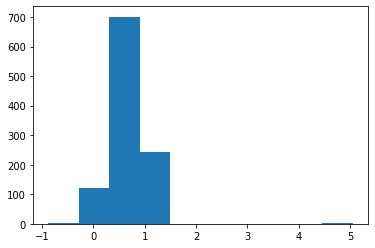

In [84]:
# x1 is the % of investments that go to transmission and distribution
investments_sales_df['pct_poles_and_wires'] = \
    (investments_sales_df['investment_value_transmission'] + \
    investments_sales_df['investment_value_distribution']) / \
    investments_sales_df['sum_investments']
x01_poles_wires_investment_pct = investments_sales_df['pct_poles_and_wires'].reset_index(drop=True)
plt.hist(x01_poles_wires_investment_pct)

**TODO: clean out data points with percentages that are negative AND those greater than 100%**

(array([10.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  1.,  1.]),
 array([1.00031702, 1.40520272, 1.81008842, 2.21497413, 2.61985983,
        3.02474553, 3.42963123, 3.83451693, 4.23940263, 4.64428833,
        5.04917403]),
 <BarContainer object of 10 artists>)

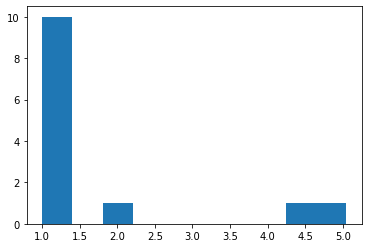

In [85]:
plt.hist(x01_poles_wires_investment_pct[x01_poles_wires_investment_pct > 1])

(array([1., 0., 1., 0., 0., 0., 0., 0., 0., 1.]),
 array([-0.88045896, -0.85189566, -0.82333236, -0.79476906, -0.76620576,
        -0.73764246, -0.70907916, -0.68051586, -0.65195256, -0.62338926,
        -0.59482596]),
 <BarContainer object of 10 artists>)

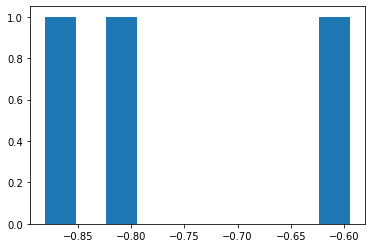

In [86]:
plt.hist(x01_poles_wires_investment_pct[x01_poles_wires_investment_pct < 0])

__x02__: % of expenditures spent on clean energy

<ipython-input-87-a462cb62fc7b>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  investments_sales_df['pct_renewable_investment'] = np.where(


(array([  1.,   1., 792., 241.,  30.,   4.,   1.,   0.,   0.,   1.]),
 array([-1.76314138, -1.10758789, -0.4520344 ,  0.20351909,  0.85907257,
         1.51462606,  2.17017955,  2.82573304,  3.48128653,  4.13684002,
         4.79239351]),
 <BarContainer object of 10 artists>)

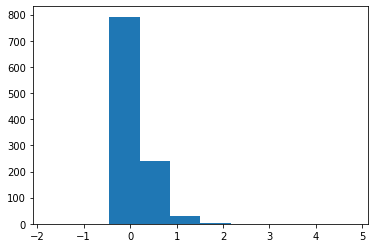

In [87]:
# x2 measures the % of expenditures for "clean" energy (renewables, nuclear, and hydro)
investments_fossil = investments_sales_df['investment_value_steam'] + investments_sales_df['investment_value_other_fossil']
investments_clean = investments_sales_df['investment_value_renewables'] + investments_sales_df['investment_value_nuclear'] + investments_sales_df['investment_value_hydro']
investments_sales_df['pct_renewable_investment'] = np.where(
    investments_sales_df['sum_investments_generation'] != 0,
    investments_clean / investments_sales_df['sum_investments_generation'], 
    0)
x02_renewables_investment_pct = investments_sales_df['pct_renewable_investment'].reset_index(drop=True)
plt.hist(x02_renewables_investment_pct)

__x03__: total investments over sales

<ipython-input-88-51fdc60d1531>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  investments_sales_df['total_divided_by_sales'] = investments_sales_df['sum_investments']/investments_sales_df['sales']


(array([  1., 100., 596., 239.,  74.,  31.,  11.,  11.,   4.,   4.]),
 array([-67.9985635 , -23.56988429,  20.85879492,  65.28747413,
        109.71615333, 154.14483254, 198.57351175, 243.00219096,
        287.43087016, 331.85954937, 376.28822858]),
 <BarContainer object of 10 artists>)

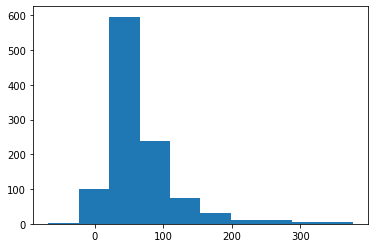

In [88]:
# x3 measures the total investments, divided by sales
investments_sales_df['total_divided_by_sales'] = investments_sales_df['sum_investments']/investments_sales_df['sales']
x03_total_investment_divided_by_sales = investments_sales_df['total_divided_by_sales'].reset_index(drop=True)
x03_total_investment_divided_by_sales[x03_total_investment_divided_by_sales>400] = x03_total_investment_divided_by_sales.median()
plt.hist(x03_total_investment_divided_by_sales)

__x04__: residential / total customers

Note, this is currently done with data from 'housing' and 'customers' columns, but could be done better with the data from customers_sales.csv


In [97]:
customer_names = ['respondent_id', 'year', 'housing_units', 'customers']
sum_customers_df = data_pre_2018_df[customer_names]
                                      
sum_customers_df.head(72)

,respondent_id,year,housing_units,customers
5,2.0,2010,1232188.0,1232188.0
6,2.0,2011,1232026.0,1232026.0
7,2.0,2012,1237730.0,1237730.0
8,2.0,2013,1241998.0,1241998.0
9,2.0,2014,1247061.0,1247061.0
...,...,...,...,...
121,11.0,2014,131724.0,132036.0
122,11.0,2015,131930.0,131784.0
123,11.0,2016,132704.0,132980.0
124,11.0,2017,132585.0,132849.0


In [98]:
sum_customers_df[sum_customers_df['customers'] == 0]

,respondent_id,year,housing_units,customers
125,11.0,2018,133192.0,0.0
1432,152.0,2013,63532.0,0.0


In [ ]:
sum_customers_df[sum_customers_df['customers'] == 0]

<ipython-input-108-3bec182aa5a5>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sum_customers_df.loc[:, 'residential_ratio'] = sum_customers_df.apply(div('housing_units', 'customers'), axis=1)


(array([   2.,    0.,    0.,    0.,   18., 1022.,   20.,    0.,    3.,
           6.]),
 array([0.        , 0.19025529, 0.38051058, 0.57076586, 0.76102115,
        0.95127644, 1.14153173, 1.33178701, 1.5220423 , 1.71229759,
        1.90255288]),
 <BarContainer object of 10 artists>)

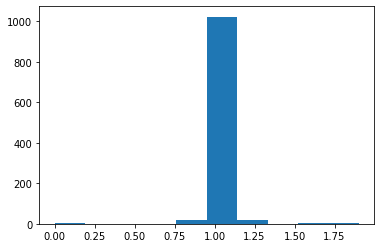

In [108]:
# handle 0 customers
def div(numerator, denominator):
  return lambda row: 0.0 if row[denominator] == 0 else float(row[numerator]/row[denominator])

sum_customers_df.loc[:, 'residential_ratio'] = sum_customers_df.apply(div('housing_units', 'customers'), axis=1)

x04_residential_customer_ratio = sum_customers_df['residential_ratio'].reset_index(drop=True)
plt.hist(x04_residential_customer_ratio)
# x04_residential_customer_ratio

__x05__: renewable / total generation (mwh)

<ipython-input-109-a09f6c87b1d3>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  gen_mwh_df['renewable_generation_ratio'] = np.where(


(array([1.00e+00, 0.00e+00, 0.00e+00, 0.00e+00, 0.00e+00, 0.00e+00,
        0.00e+00, 0.00e+00, 0.00e+00, 1.07e+03]),
 array([-72.44752519, -64.51646531, -56.58540542, -48.65434553,
        -40.72328564, -32.79222575, -24.86116587, -16.93010598,
         -8.99904609,  -1.0679862 ,   6.86307369]),
 <BarContainer object of 10 artists>)

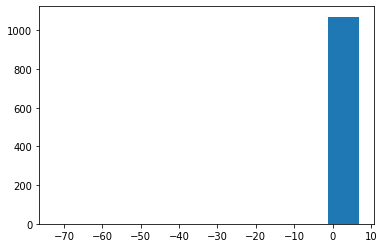

In [109]:
gen_mwh_df['renewable_generation_ratio'] = np.where(
    gen_mwh_df['sum_generation_wo_purchased'] != 0,
    gen_mwh_df['sum_clean_generation'] / gen_mwh_df['sum_generation_wo_purchased'],
    0)
x05_renewable_generation_ratio = gen_mwh_df['renewable_generation_ratio']
plt.hist(x05_renewable_generation_ratio) 

__x06__: nuclear / clean bills ($) <font color=purple>--> deprecated</font>

In [28]:
# x6 measures the ratio of nuclear to clean bills
bills_clean = sum_bills_df['bill_renewables'] + sum_bills_df['bill_nuclear'] + sum_bills_df['bill_hydro']

x06_nuclear_renewable_bill_ratio = sum_bills_df['bill_nuclear']/bills_clean

for index, value in x06_nuclear_renewable_bill_ratio.items():
    v = x06_nuclear_renewable_bill_ratio[index]
    if np.isnan(v):
        x06_nuclear_renewable_bill_ratio[index] = 0

x06_nuclear_renewable_bill_ratio

respondent_id
2.0      0.801151
3.0      0.000000
6.0      0.000000
7.0      0.853058
8.0      0.990068
           ...   
281.0    0.000000
288.0    0.000000
290.0    0.000000
403.0    0.000000
428.0    0.000000
Length: 116, dtype: float64

__x06__: nuclear / clean generation (mwh)

(array([93.,  0.,  2.,  0.,  0.,  0.,  2.,  2.,  1., 16.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

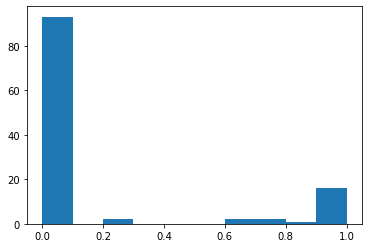

In [29]:
gen_mwh_df['nuclear_renewable_ratio'] = np.where(
    gen_mwh_df['sum_clean_generation'] != 0,
    gen_mwh_df['generation_nuclear'] / gen_mwh_df['sum_clean_generation'],
    0)
x06_nuclear_renewable_mwh_ratio = gen_mwh_df['nuclear_renewable_ratio']
plt.hist(x06_nuclear_renewable_mwh_ratio)

__x07__: hydro / clean bills ($) <font color=purple>--> deprecated</font>

In [30]:
# x07 measures the ratio of hydro to clean bills

x07_hydro_renewable_ratio = sum_bills_df['bill_hydro']/bills_clean

for index, value in x07_hydro_renewable_ratio.items():
    v = x07_hydro_renewable_ratio[index]
    if np.isnan(v):
        x07_hydro_renewable_ratio[index] = 0

x07_hydro_renewable_ratio

respondent_id
2.0      0.194781
3.0      1.000000
6.0      1.000000
7.0     -0.000670
8.0      0.009932
           ...   
281.0    0.000000
288.0    0.000000
290.0    0.000000
403.0    0.000000
428.0    0.000000
Length: 116, dtype: float64

__x07__: hydro / clean generation (mwh)

(array([77.,  7.,  2.,  6.,  1.,  4.,  0.,  0.,  2., 17.]),
 array([-0.09977336,  0.01076953,  0.12131242,  0.23185531,  0.3423982 ,
         0.45294109,  0.56348398,  0.67402687,  0.78456976,  0.89511264,
         1.00565553]),
 <BarContainer object of 10 artists>)

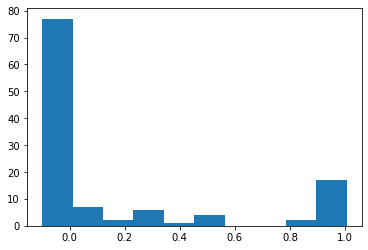

In [31]:
gen_mwh_df['hydro_renewable_ratio'] = np.where(
    gen_mwh_df['sum_clean_generation'] != 0,
    gen_mwh_df['generation_hydro'] / gen_mwh_df['sum_clean_generation'],
    0)
x07_hydro_renewable_mwh_ratio = gen_mwh_df['hydro_renewable_ratio']
plt.hist(x07_hydro_renewable_mwh_ratio)

__x08__: regulatory environment (rps targets)

(array([57., 21., 15.,  6.,  2.,  1.,  4.,  3.,  1.,  6.]),
 array([ 0.        ,  5.09090909, 10.18181818, 15.27272727, 20.36363636,
        25.45454545, 30.54545455, 35.63636364, 40.72727273, 45.81818182,
        50.90909091]),
 <BarContainer object of 10 artists>)

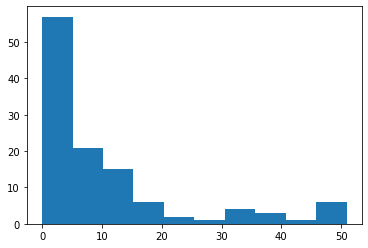

In [32]:
data_from_2020 = data_after_2010_df[data_after_2010_df['year'] == 2020].copy()
data_year_mean = data_after_2010_df.groupby(['respondent_id']).agg({'rps_score': ['mean']}).reset_index(drop=True)
data_year_mean = data_year_mean.droplevel(1, axis=1)
x08_regulatory_rps_target = data_year_mean['rps_score']
plt.hist(x08_regulatory_rps_target)

__c09__: utility type (veritcally integrated, poles and wires only, etc.)

(array([70.,  0.,  0., 31.,  0.,  0., 14.,  0.,  0.,  1.]),
 array([0. , 0.3, 0.6, 0.9, 1.2, 1.5, 1.8, 2.1, 2.4, 2.7, 3. ]),
 <BarContainer object of 10 artists>)

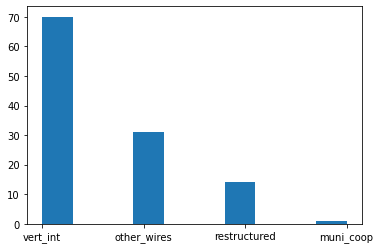

In [33]:
c09_utility_type = utility_info_df['utype']
plt.hist(c09_utility_type)

Consolidate feature variables into model_data table

In [34]:
model_data = pd.DataFrame(
    {
        'target': target, 
        'x01': x01_poles_wires_investment_pct,
        'x02': x02_renewables_investment_pct,
        'x03': x03_total_investment_divided_by_sales,
        'x04': x04_residential_customer_ratio,
        'x05': x05_renewable_generation_ratio,
        'x06': x06_nuclear_renewable_mwh_ratio,
        'x07': x07_hydro_renewable_mwh_ratio,
        'x08': x08_regulatory_rps_target,
        'c09': c09_utility_type,
    }
)
model_data

,target,x01,x02,x03,x04,x05,x06,x07,x08,c09
0,0.019042,0.351208,0.110678,95.893125,1.000000,0.290916,0.778672,0.220809,0.000000,vert_int
1,0.015868,0.513455,0.476233,31.004672,1.000000,0.916615,0.000000,1.000000,0.000000,vert_int
2,0.022832,0.642341,0.039913,54.876484,1.000005,0.024628,0.000000,1.000080,10.487586,vert_int
3,0.012631,0.419923,0.251899,77.037977,1.000554,0.325085,0.963355,0.000000,14.585460,vert_int
4,0.019896,0.610624,0.525933,65.810615,1.000000,0.537077,0.990224,0.009776,0.000000,vert_int
...,...,...,...,...,...,...,...,...,...,...
111,0.024167,0.340022,0.432720,146.585683,0.957505,0.104220,0.000000,0.000000,0.736438,vert_int
112,-0.000717,0.752316,0.272331,43.845785,1.005311,0.019952,0.000000,0.000000,11.250000,vert_int
113,0.018307,0.804942,0.000000,44.646336,1.000004,0.000000,0.000000,0.000000,0.000000,other_wires
114,0.031448,0.712044,0.425716,87.288900,1.001288,0.002061,0.000000,0.000000,0.000000,vert_int


#### Check for covariance

In [35]:
# import seaborn as sns
# sns.pairplot(model_data.drop(columns=['target']))

In [36]:
corr = model_data.corr()
corr.style.background_gradient(cmap='coolwarm')

,target,x01,x02,x03,x04,x05,x06,x07,x08
target,1.000000,-0.477051,0.160433,0.233352,-0.150931,0.201071,0.145987,0.136563,-0.086536
x01,-0.477051,1.000000,-0.334536,-0.441633,0.177967,-0.212036,-0.277082,-0.134305,0.108929
x02,0.160433,-0.334536,1.000000,0.387111,-0.111374,0.682444,0.399664,0.249383,0.323810
x03,0.233352,-0.441633,0.387111,1.000000,-0.053620,0.145790,0.233538,0.047647,0.181448
x04,-0.150931,0.177967,-0.111374,-0.053620,1.000000,-0.017495,-0.083951,-0.034898,0.194726
x05,0.201071,-0.212036,0.682444,0.145790,-0.017495,1.000000,0.385036,0.316093,0.286064
x06,0.145987,-0.277082,0.399664,0.233538,-0.083951,0.385036,1.000000,-0.202189,0.216470
x07,0.136563,-0.134305,0.249383,0.047647,-0.034898,0.316093,-0.202189,1.000000,0.217405
x08,-0.086536,0.108929,0.323810,0.181448,0.194726,0.286064,0.216470,0.217405,1.000000


#### Save model_data file

In [37]:
output_dir = os.path.join('..', 'data', 'processed')

In [38]:
model_data.to_csv(os.path.join(output_dir, 'model_data.csv'), index=False)